In [38]:
import matplotlib.pyplot as plt 
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd #data processing

from sklearn.model_selection import train_test_split

import os
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression# Logistic Regression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix


In [3]:
df = pd.read_csv('datasets/gossipcop_data_2.csv')
df

,title,label
0,Trump blocks Chrissy Teigen on Twitter,REAL
1,Lady Gaga Swigs Vinegar Diet For Bradley Cooper,FAKE
2,Kim Cattrall pleads with fans to help find mis...,REAL
3,Jimmy Kimmel Mocks Kanye West's TMZ Interview,REAL
4,Kashing In! Kim & Kanye Go On INSANE Shopping ...,FAKE
...,...,...
22135,Nicole Kidman Gets Honest About Her Best Beaut...,FAKE
22136,"Why William, Kate Chose Willcocks for Charlott...",REAL
22137,Mamma Mia 2: Amanda Seyfried opens up on worki...,FAKE
22138,Incredibles 2 Trailer Shows Bob and Ellen Trad...,REAL


In [9]:
train, test = train_test_split(df, test_size=0.3)
train

,title,label
6272,Real Housewives of Atlanta Reunion Shocker: Ar...,REAL
17561,Neil Patrick Harris' Marriage to David Burtka ...,FAKE
4880,Tom Cruise and Jane Fonda spark romance rumours,FAKE
14446,Ryan Reynolds reveals best prank he's ever pulled,REAL
4290,Dakota Johnson had to teach Jamie Dornan how t...,REAL
...,...,...
12311,"The weeknd, john legend and more celebs who ha...",REAL
1365,‘Roseanne’: ‘Shameless’ Star Emma Kenney Set A...,REAL
11341,Lisa Vanderpump pays tribute to late brother: ...,REAL
20234,Bella Hadid’s Summertime Ponytail Is for Your ...,REAL


In [11]:
print(train.shape, test.shape)

(15498, 2) (6642, 2)


In [12]:
print(train.isnull().sum())
print('************')
print(test.isnull().sum())

title    0
label    0
dtype: int64
************
title    0
label    0
dtype: int64


In [13]:
test=test.fillna(' ')
train=train.fillna(' ')

In [18]:
stop_words = stopwords.words('english')
lemmatizer=WordNetLemmatizer()
for index,row in train.iterrows():
    filter_sentence = ''
    
    sentence = row['title']
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning
    
    words = nltk.word_tokenize(sentence) #tokenization
    
    words = [w for w in words if not w in stop_words]  #stopwords removal
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()
        
    train.loc[index,'title'] = filter_sentence


In [27]:
train = train[['title','label']]

In [28]:
X_train = train['title']
Y_train = train['label']

In [29]:
#Feature extraction using count vectorization and tfidf.
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.transform(freq_term_matrix)

In [109]:
print(tf_idf_matrix)

  (0, 12777)	0.3713292597956817
  (0, 12741)	0.38568608307884883
  (0, 11826)	0.2526473032386039
  (0, 11447)	0.23398410510431167
  (0, 10577)	0.36563165268872844
  (0, 10349)	0.33605598344345994
  (0, 9408)	0.2938732488022067
  (0, 6916)	0.26283451034974403
  (0, 3798)	0.22702526317898114
  (0, 1180)	0.3170135057331639
  (0, 1042)	0.20169277695686097
  (1, 10414)	0.3305051542215896
  (1, 9697)	0.38495599109770207
  (1, 8851)	0.24064360707708304
  (1, 7327)	0.15528691652053905
  (1, 6494)	0.34232464342687713
  (1, 5183)	0.3724520059120066
  (1, 5015)	0.24012306676620115
  (1, 3805)	0.2558481250554609
  (1, 2327)	0.4150833535828315
  (1, 979)	0.3305051542215896
  (2, 14431)	0.3021819560091198
  (2, 13285)	0.41807332542528286
  (2, 12160)	0.40116906060121227
  (2, 12040)	0.3197444689194188
  :	:
  (15495, 2219)	0.32695293944146825
  (15496, 15787)	0.24542998366310909
  (15496, 13784)	0.43078932781111506
  (15496, 13716)	0.25858055587848894
  (15496, 10815)	0.3832501803327908
  (15496, 10

In [107]:
tf_idf_matrix.toarray().shape

(15498, 15862)

In [110]:
tf_idf_matrix.toarray()


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [111]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in iter.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [33]:
test_counts = count_vectorizer.transform(test['title'].values)
test_tfidf = tfidf.transform(test_counts)

#split in samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_train, random_state=0)

In [34]:
print(X_train.shape,X_test.shape)

(11623, 15862) (3875, 15862)


In [114]:
X_test.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [116]:
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
print('Accuracy of Logistic classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

cm = confusion_matrix(y_test, pred)
cm

Accuracy of Logistic classifier on training set: 0.99
Accuracy of Logistic classifier on test set: 0.82


/Users/zensajnani/Desktop/Zen Projects/Hackathon/fake_news_detection/env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[ 548,  403],
       [ 302, 2622]])

Confusion matrix, without normalization


AttributeError: 'builtin_function_or_method' object has no attribute 'product'

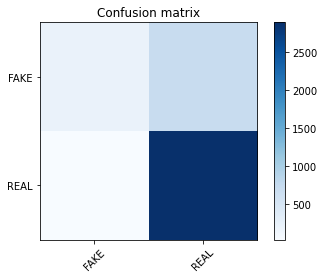

In [121]:
plot_confusion_matrix(cm,classes=['FAKE', 'REAL'])

In [122]:
NB = MultinomialNB()
NB.fit(X_train, y_train)
pred = NB.predict(X_test)
print('Accuracy of NB  classifier on training set: {:.2f}'
     .format(NB.score(X_train, y_train)))
print('Accuracy of NB classifier on test set: {:.2f}'
     .format(NB.score(X_test, y_test)))
cm = confusion_matrix(y_test, pred)
cm

Accuracy of NB  classifier on training set: 0.85
Accuracy of NB classifier on test set: 0.80


array([[ 225,  726],
       [  36, 2888]])

In [136]:
#Assiging the variables again as once transformed vectors can't be transformed again using pipeline.
X_train = train['title']
Y_train = train['label']

In [137]:
from sklearn.pipeline import Pipeline
import joblib

from sklearn import linear_model

In [140]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(norm='l2')),
    ('clf', linear_model.LogisticRegression(C=1e5)),
])


In [142]:
pipeline.fit(X_train, Y_train)

/Users/zensajnani/Desktop/Zen Projects/Hackathon/fake_news_detection/env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=100000.0))])

In [143]:
pipeline.predict(["flyn&&&&n hillary clinton big woman campus breitbart daniel j flynnever get feeling life circle roundabout rather head straight line toward intended destination hillary clinton remains big woman campus leafy liberal wellesley massachusetts everywhere else vote likely inauguration dress remainder day way miss havisham forever wore wedding dress speaking great expectations hillary rodham overflowed 48 year ago first addressed wellesley graduating class the president college informed gathered 1969 student needed debate far i could ascertain spokesman kind like democratic primary 2016 minus term unknown even seven sisters school i glad miss adams made clear i speaking today u 400 u miss rodham told classmate after appointing edger bergen charlie mccarthys mortimer snerds attendance bespectacled granny glass awarding matronly wisdom least john lennon wisdom took issue previous speaker despite becoming first win election seat u s senate since reconstruction edward brooke came criticism calling empathy goal protestors criticized tactic though clinton senior thesis saul alinsky lamented black power demagogue elitist arrogance repressive intolerance within new left similar word coming republican necessitated brief rebuttal trust rodham ironically observed 1969 one word i asked class rehearsal wanted say everyone came said talk trust talk lack trust u way feel others talk trust bust what say what say feeling permeates generation perhaps even understood distrusted the trust bust certainly busted clintons 2016 plan she certainly even understand people distrusted after whitewater travelgate vast conspiracy benghazi missing email clinton found distrusted voice friday there load compromising road broadening political horizon and distrust american people trump edged 48 percent 38 percent question immediately prior novembers election stood major reason closing horizon clinton described vanquisher supporter embracing lie con alternative fact assault truth reason she failed explain american people chose lie truth as history major among today know well people power invent fact attack question mark beginning end free society offered that hyperbole like many people emerge 1960s hillary clinton embarked upon long strange trip from high school goldwater girl wellesley college republican president democratic politician clinton drank time place gave degree more significantly went idealist cynic comparison two wellesley commencement address show way back lamented long leader viewed politics art possible challenge practice politics art making appears impossible possible now big woman campus odd woman white house wonder current station even possible why arent i 50 point ahead asked september in may asks isnt president the woman famously dubbed congenital liar bill safire concludes lie mind getting stood election day like finding jilted bride wedding day inspires dangerous delusion"])

array(['REAL'], dtype=object)

In [144]:
#saving the pipeline
filename = 'pipeline1.sav'
joblib.dump(pipeline, filename)

['pipeline1.sav']

In [145]:
loaded_model = joblib.load(filename)


In [157]:
result = loaded_model.predict(["‘Tormented’ Brad Pitt will only be allowed ‘to spend four hours with his children on Christmas Day’"])
print(result) 

['FAKE']
